<a href="https://colab.research.google.com/github/julianafrmendes/Business-Analytics/blob/master/Segmentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Business Analytics</font>

# <font color='blue'>Projeto de  Marketing Analytics</font>
# <font color='blue'>Segmentação de Clientes de Food Delivery</font>

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


### Usando Segmentos de Clientes

Características comuns nos segmentos de clientes podem orientar como uma empresa comercializa segmentos individuais e quais produtos ou serviços ela promove. Uma pequena empresa que vende guitarras feitas à mão, por exemplo, pode decidir promover produtos com preços mais baixos para guitarristas mais jovens e guitarras premium com preços mais altos para músicos mais velhos, com base no conhecimento do segmento que lhes diz que os músicos mais jovens têm menos renda disponível do que seus colegas mais velhos.

A segmentação de clientes pode ser praticada por todas as empresas, independentemente do tamanho ou setor, e se vendem on-line ou presencialmente. Começa com a coleta e a análise de dados e termina com a atuação nas informações coletadas de maneira apropriada e eficaz, com a entrega das conclusões.

In [1]:
# Imports

# Manipulação e visualização de dados
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Formatação dos gráficos
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

### 1-  Compreendendo os dados

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Juliana Mendes" --iversions

In [3]:
# Carrega o dataset
dados = pd.read_csv("Marketing1.csv", encoding = 'utf-8')

In [ ]:
# Shape
dados.shape

(260645, 7)

In [4]:
# Visualiza os dados
dados.head(4)

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059


In [5]:
# Verifica o total de valores únicos por coluna
dados.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [6]:
# Tipos de dados
dados.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [7]:
# Resumo das colunas numéricas
dados.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [8]:
# Tabela pivot com id_transacao, nome_item e quantidade_item
df_pivot = dados.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')
df_pivot.head(4)

nome_item,bebida,pizza,salada,sobremesa
id_transacao,,,,
0x10000a,NaN,1.0,NaN,1.0
0x100058,NaN,2.0,NaN,2.0
0x1000c8,4.0,4.0,1.0,5.0
0x10014c,NaN,1.0,NaN,1.0


In [9]:
# Substituímos possíveis valores NA gerados no pivot, por 0 e transformamos o índice em coluna
df_pivot = df_pivot.fillna(0).reset_index()
df_pivot.head(4)

nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0


In [10]:
# Não podemos ter valores nulos
df_pivot.isnull().sum()

nome_item
id_transacao    0
bebida          0
pizza           0
salada          0
sobremesa       0
dtype: int64

In [11]:
# Describe
df_pivot.describe()

nome_item,bebida,pizza,salada,sobremesa
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.239590,1.857840,0.711370,2.569210
std,1.627886,1.588589,1.086524,1.332084
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,2.000000
75%,3.000000,3.000000,1.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [12]:
#Visualiza tabela
df_pivot.head(6)


nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0
4,0x1001d8,3.0,3.0,0.0,3.0
5,0x1002af,3.0,3.0,1.0,4.0


##### Extraindo Granularidade de Tempo

In [13]:
# Extraímos o mês da coluna horario_pedido e gravamos em uma nova coluna
dados['mes'] = dados['horario_pedido'].apply(lambda x: time.strftime("%m", time.strptime(x,"%Y-%m-%d %H:%M:%S")))

In [14]:
# Vamos incluir a coluna mês e para fazer o merge precisamos de uma coluna em comum, nesse caso, id_transacao
df_pivot = df_pivot.merge(dados[['id_transacao', 'mes','localidade']])

In [15]:
#Ajustar o Indice
# Índice
dados.index

RangeIndex(start=0, stop=260645, step=1)

In [16]:
dados_idx = dados.reset_index()

In [17]:
df_pivot = df_pivot.reset_index()
df_pivot.head(4)

,index,id_transacao,bebida,pizza,salada,sobremesa,mes,localidade
0,0,0x10000a,0.0,1.0,0.0,1.0,01,9
1,1,0x10000a,0.0,1.0,0.0,1.0,01,9
2,2,0x100058,0.0,2.0,0.0,2.0,05,6
3,3,0x100058,0.0,2.0,0.0,2.0,05,6


### 2- Visualizando os dados

##### Atributos de segmentação

KeyboardInterrupt: ignored

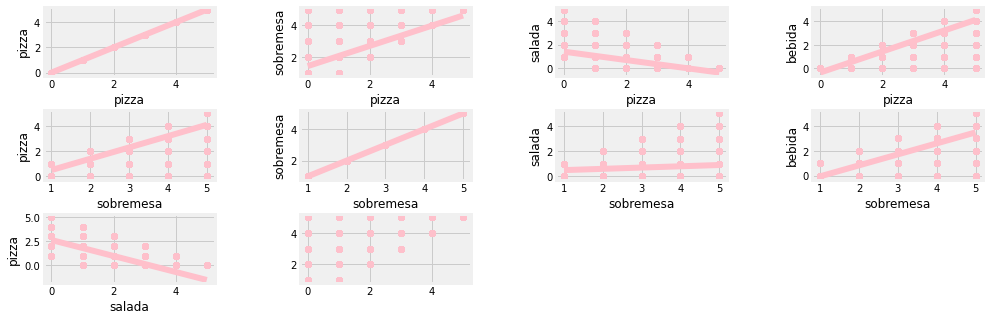

In [18]:
# Relação Entre os Atributos

# Tamanho da figura
plt.figure(1 , figsize = (15 , 7))

# Inicializa o contador
n = 0 

# Loop pelos atributos
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
    for y in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df_pivot, color='pink')
        plt.ylabel(y)
        
plt.show()

Podemos visualizar a relação de uma variável com outras variáveis para entendermos a relação entre elas

##### Total de Pedidos por localidade

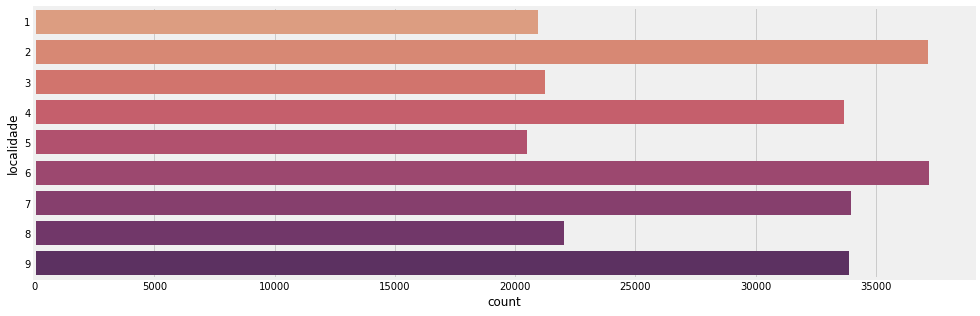

In [19]:
# Plot

plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'localidade' , data = df_pivot, palette= 'flare')
plt.show()

### 3- Iniciando processo de agrupamento

O K-Means Clustering é um algoritmo de aprendizado de máquina não supervisionado. Em contraste com os algoritmos tradicionais de aprendizado de máquina supervisionado, o K-Means tenta classificar dados sem antes ter sido treinado com dados rotulados. Depois que o algoritmo é executado e os grupos são definidos, qualquer novo dado pode ser facilmente atribuído ao grupo mais relevante.

##### Seguiremos as etapas:

1- Definição de variáveis

2- Preparação do modelo para o algoritmo

3- Apresentação do modelo

4- Conclusões

In [20]:
# Definindo as Variàveis
df1 = df_pivot[['index', 'bebida', 'pizza', 'sobremesa', 'salada']]
df1.head(4)

,index,bebida,pizza,sobremesa,salada
0,0,0.0,1.0,1.0,0.0
1,1,0.0,1.0,1.0,0.0
2,2,0.0,2.0,2.0,0.0
3,3,0.0,2.0,2.0,0.0


In [21]:
# Usaremos duas variáveis
X1 = df1[['pizza' , 'sobremesa']].iloc[: , :].values

##### Método Curva de Elbow

A curva de elbow mosta os pontos de agrupamento e sua pontuação quanto a precisão deo modelo

In [22]:
# Lista do WCSS
wcss_X1 = []

In [23]:
# Loop para testar os valores de K
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    wcss_X1.append(modelo.inertia_)

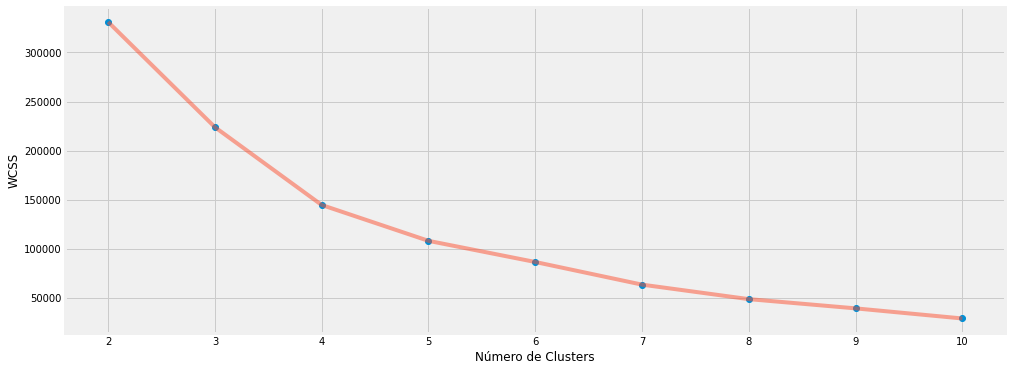

In [24]:
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

A curva de elbow mostra o número de clusters mais eficiente para representar os padrões de cada grupo.

#### 2- Preparação do modelo para o algoritmo

In [25]:
# Criação do modelo, apesar da representção da curva de Elbow, o número de clusters para a análise será apenas 2, para que a análise seja mais breve
modelo_seg1 = KMeans(n_clusters = 2, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

In [26]:
# Treinamento do modelo
modelo_seg1.fit(X1)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [27]:
# Extração dos labels
labels1 = modelo_seg1.labels_
labels1

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [28]:
# Extração dos centróides
centroids1 = modelo_seg1.cluster_centers_
centroids1

array([[3.76652414, 4.07619962],
       [0.9613099 , 1.87537776]])

#### 3- Visualizando o modelo.


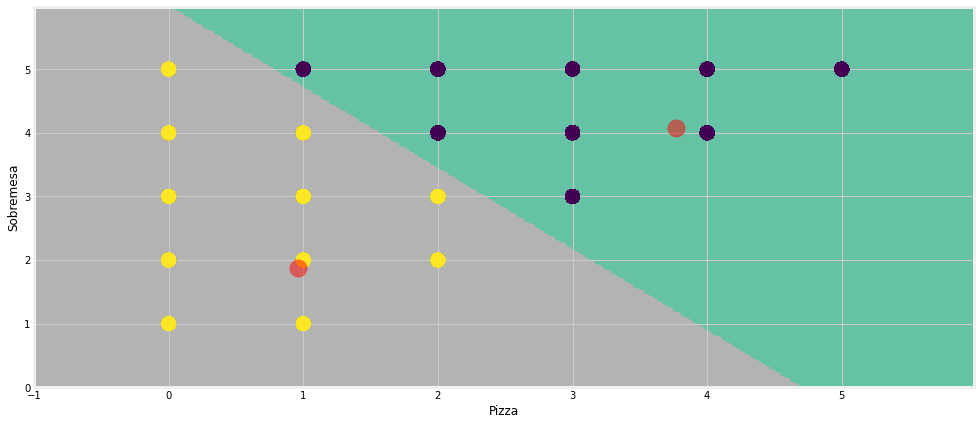

In [31]:
# Plot dos pontos de dados

# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'sobremesa', data = df1, c = labels1, s = 200 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

O grafico mostra o agrupamento das duas váriaveis, pizza e sobremesa.

Os pontos vermelhos são os centróides, os pontos centrais dos 2 grupos. 

O modelo agrupou esse clientes em 2 grupos:
Grupo 1: Clientes que compram até 2 pizzas
Grupo 2: Clientes que compram acima de 3 pizzas.




#### 4- Conclusão

O modelo dividiu o dataset em dois grupos distintos que nos levaram a interpretação que existe uma relação positiva entre clientes que compram pizza e sobremesa, e que existe 1 grupo que consome um número menor de pizza e outro um número maior, acima de 3 unidades.



### FIM